In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import *
from atomtoolkit import IO
import atomtoolkit.render.lineshapes as lineshapes
from atomtoolkit.atom import Atom
import atomtoolkit.render.spectra as spectra
from atomtoolkit.render.grotrian import draw_levels
from pprint import pprint
import numpy as np

In [2]:
resource_path = 'C:/Users/jippi/PycharmProjects/Atom-Toolkit/resources'

def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load=False):
    if load:
        a = Atom.load(f'atoms/{species}.atom')
    else:
        df = IO.load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = IO.load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = IO.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                            num_levels=num_levels,
                                            B=B,
                                            hf_csv=f'{resource_path}/{species}_Hyperfine.csv',
                                            transitions_df=trans_df,
                                            allowed=0b101)
        if save:
            a.save(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'{resource_path}/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [3]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [10]:
# whether to load from pickle
load = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 100
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load=load, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.84it/s]
adding level 4f13.(2F*<5/2>).5d2.(3F) 3[11/2]*13/2                                                                     
adding transition 4f13.(2F*<7/2>).6s.6p.(3P*<0>) (7/2,0)7/2 → 4f13.(2F*<7/2>).5d2.(3F) 3[9/2]*7/2                      
adding internal transitions to 4f13.(2F*<5/2>).5d2.(3F) 3[11/2]*13/2                                                   

Generation complete


In [5]:
pprint(a.levels.list_names())

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[9/2]*9/2',
 '4f13.(

In [7]:
# pprint(a.transitions.list_names())

In [48]:
for l in a.levels.values():
    print(l, l.compute_gJ()-l.lande)

4f14.6s 2S1/2 0.0042999999999999705
4f13.(2F*).6s2 2F*7/2 -0.0018142857142857682
4f13.(2F*).6s2 2F*5/2 -0.005185714285714238
4f14.5d 2D3/2 -1.0024600000000001
4f14.5d 2D5/2 -0.0015399999999998748
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2 -0.0644467390401331
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2 0.8221766798109802
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 0.08451004629220082
4f14.6p 2P*1/2 -0.001100000000000101
4f14.6p 2P*3/2 0.001100000000000101
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2 0.34646834723705267
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2 0.455009640746582
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2 0.0013000000000000789
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2 -0.027627130164824765
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2 0.6984120155741509
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2 0.44378387983171497
4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2 -0.0385453518712191
4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2 0.3606829248940986
4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2 0.5970381908871836
4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2

In [8]:
a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

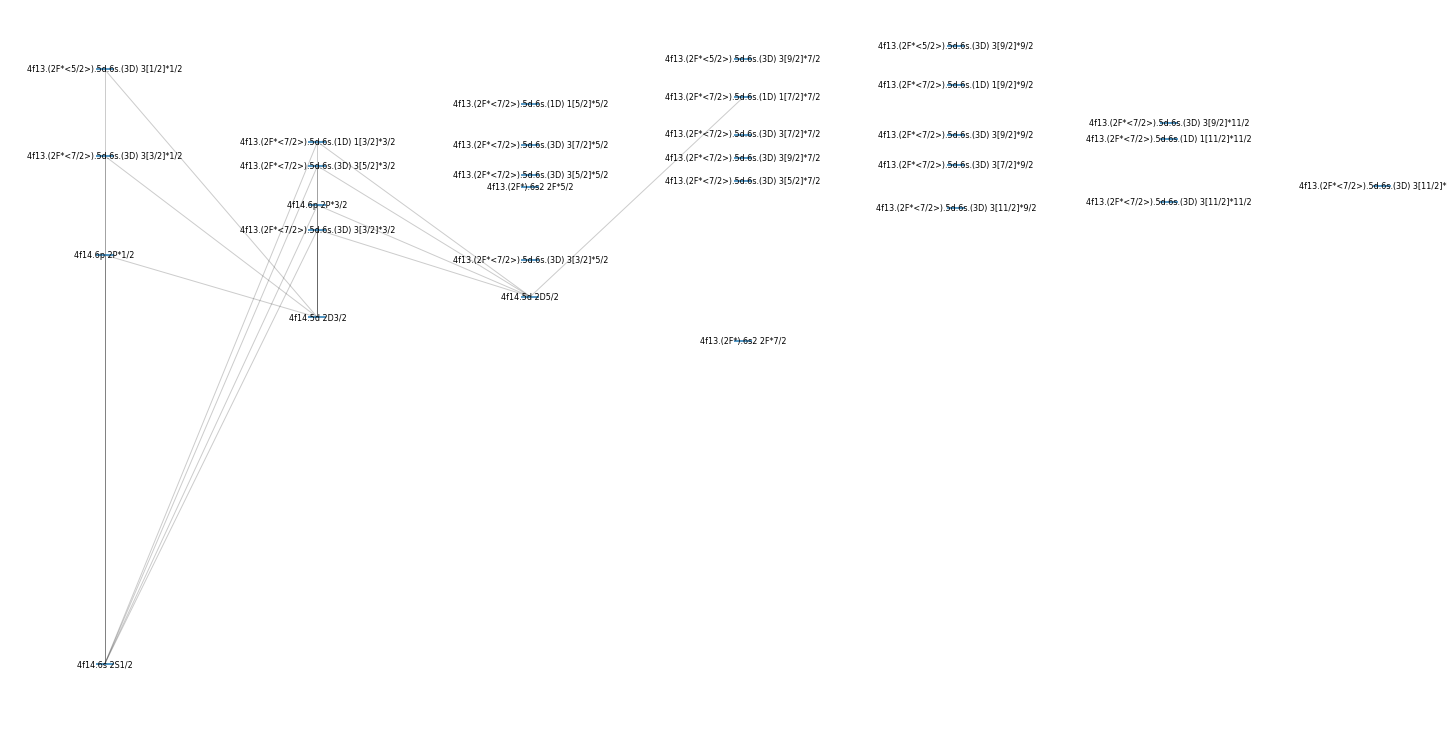

In [9]:
plt.figure(figsize=(20, 10))
draw_levels(a)

In [11]:
a.compute_branching_ratios('4f14.6p 2P*3/2')

{'4f14.6s 2S1/2': 0.987698986975398,
 '4f14.5d 2D3/2': 0.002098408104196816,
 '4f14.5d 2D5/2': 0.010202604920405211}

In [38]:
a.linked_levels('4f14.6p 2P*3/2')

{'4f14.6s 2S1/2': Transition(4f14.6s 2S1/2 → 4f14.6p 2P*3/2, freq=911136133580133.9 hertz, A=136.5,
 '4f14.5d 2D3/2': Transition(4f14.5d 2D3/2 → 4f14.6p 2P*3/2, freq=222788666615493.88 hertz, A=0.29,
 '4f14.5d 2D5/2': Transition(4f14.5d 2D5/2 → 4f14.6p 2P*3/2, freq=181660439094931.88 hertz, A=1.41}

In [39]:
a.transitions[('4f14.6p 2P*3/2', '4f14.5d 2D3/2')].wl

1345.6360350565105 <Unit('nanometer')>

In [40]:
a.transitions[('4f14.6p 2P*3/2', '4f14.6s 2S1/2')].wl

329.0314662662134 <Unit('nanometer')>

In [41]:
a.levels['4f14.6p 2P*3/2'].hfA.to('MHz')

875.4 <Unit('megahertz')>